In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import os
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import shapiro

In [80]:
os.chdir("C:\\Users\\vasan\\Desktop\\SDP")

In [81]:
###
start_date = '2005-01-01'
end_date = '2022-03-01'

ticker = 'NFLX'

data =yf.download(ticker, start_date, end_date)
###

[*********************100%***********************]  1 of 1 completed


In [82]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-31,1.830000,1.830000,1.747143,1.761429,1.761429,9830800
2005-01-03,1.800000,1.800000,1.645714,1.702857,1.702857,11334400
2005-01-04,1.702857,1.707143,1.607143,1.665714,1.665714,17352300
2005-01-05,1.677143,1.677143,1.584286,1.600000,1.600000,12732300
2005-01-06,1.600000,1.624286,1.572857,1.578571,1.578571,8273300


In [83]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-22,388.950012,392.420013,373.019989,377.380005,377.380005,6697500
2022-02-23,382.720001,386.000000,366.660004,367.459991,367.459991,4614300
2022-02-24,355.089996,390.730011,354.720001,390.029999,390.029999,7068700
2022-02-25,386.609985,391.290009,375.579987,390.799988,390.799988,4841600
2022-02-28,387.329987,397.750000,382.130005,394.519989,394.519989,5030600


In [84]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4.320000e+03
mean,131.239890,133.210266,129.162683,131.248851,131.248851,1.655094e+07
std,174.623531,177.087614,171.957265,174.567593,174.567593,1.874255e+07
min,1.300000,1.317143,1.272857,1.290000,1.290000,1.144000e+06
25%,5.667500,5.772500,5.542143,5.679286,5.679286,6.232775e+06
50%,38.957859,39.567142,38.375000,39.070713,39.070713,1.048550e+07
75%,193.385002,195.292500,191.175003,193.802502,193.802502,1.991482e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.155418e+08


In [85]:
data.info();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4320 entries, 2004-12-31 to 2022-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4320 non-null   float64
 1   High       4320 non-null   float64
 2   Low        4320 non-null   float64
 3   Close      4320 non-null   float64
 4   Adj Close  4320 non-null   float64
 5   Volume     4320 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 236.2 KB


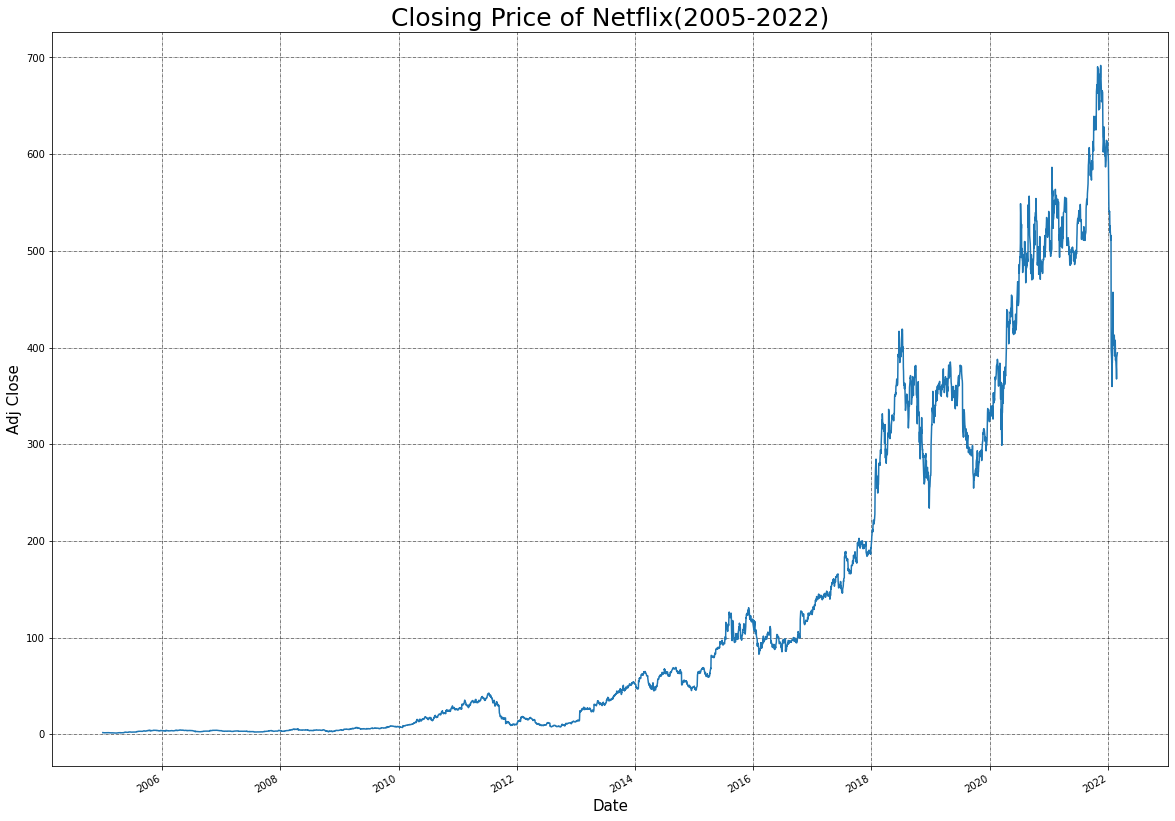

In [86]:
plt.figure(figsize=(20, 15))
plt.ylabel("Adj Close", fontsize = 15)
plt.xlabel(None, fontsize = 15)
plt.title("Closing Price of Netflix(2005-2022)", fontsize = 25)
data["Adj Close"].plot()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

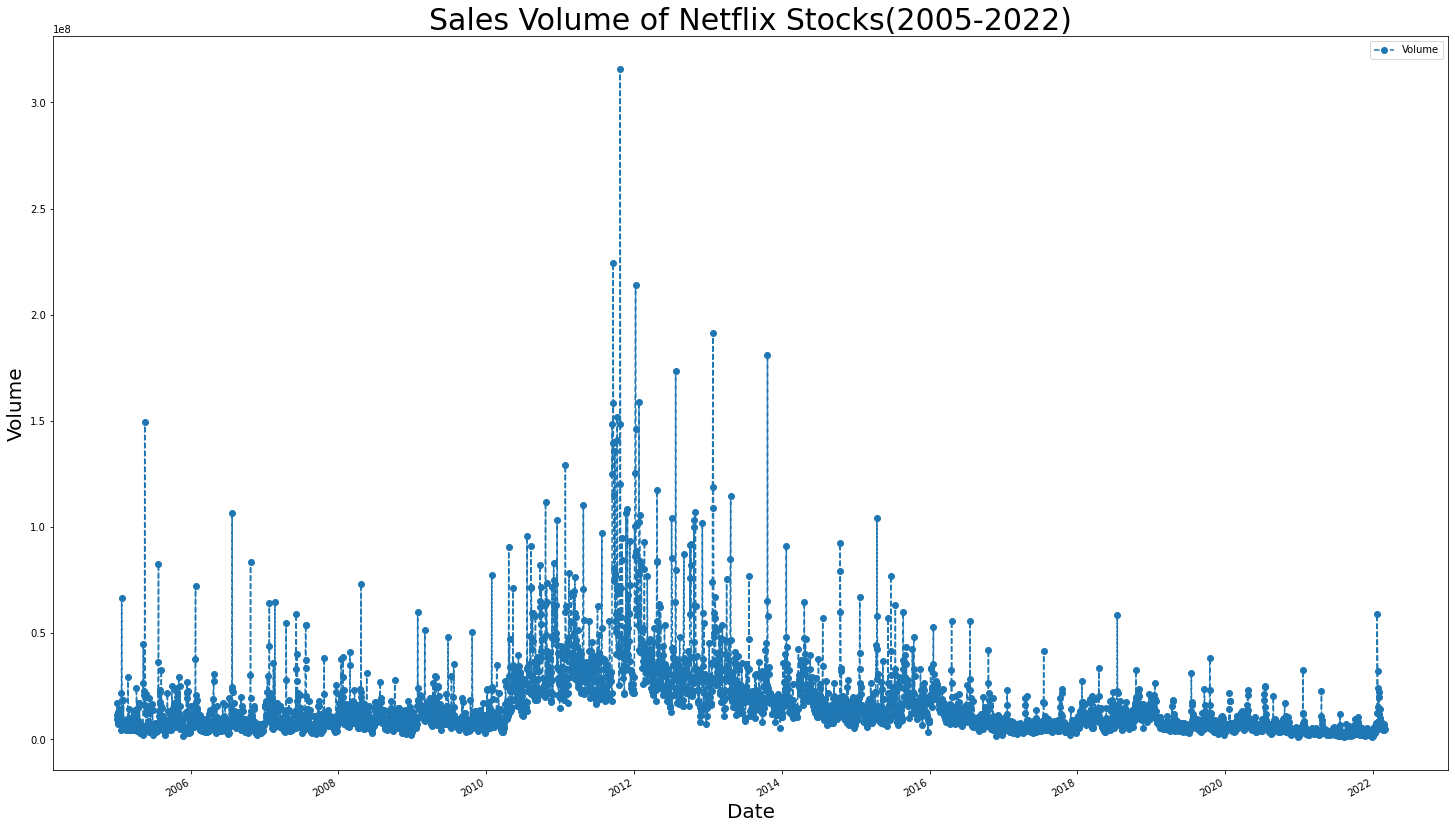

In [87]:
plt.figure(figsize=(25, 15))
plt.ylabel("Volume", fontsize = 20)
plt.xlabel(None, fontsize = 20)
plt.title("Sales Volume of Netflix Stocks(2005-2022)", fontsize = 30)
data["Volume"].plot(legend=True, linestyle='--', marker='o');

In [88]:
data1=pd.DataFrame()
mov_avg_day = [10, 20, 50]
for ma in mov_avg_day:
    column_name = f"MA for {ma} days"
    data1[column_name] = data['Adj Close'].rolling(ma).mean()

In [89]:
data1.dropna(inplace=True)

In [90]:
data1["Adj Close"]=data["Adj Close"].copy()

In [91]:
data1

,MA for 10 days,MA for 20 days,MA for 50 days,Adj Close
Date,,,,
2005-03-14,1.461000,1.495000,1.570143,1.357143
2005-03-15,1.438286,1.481000,1.561200,1.314286
2005-03-16,1.416714,1.466143,1.553343,1.310000
2005-03-17,1.397286,1.453643,1.546314,1.314286
2005-03-18,1.375857,1.444357,1.540600,1.314286
...,...,...,...,...
2022-02-22,397.145001,400.012505,498.118600,377.380005
2022-02-23,393.538000,400.064503,493.234600,367.459991
2022-02-24,391.251999,401.581003,488.944000,390.029999


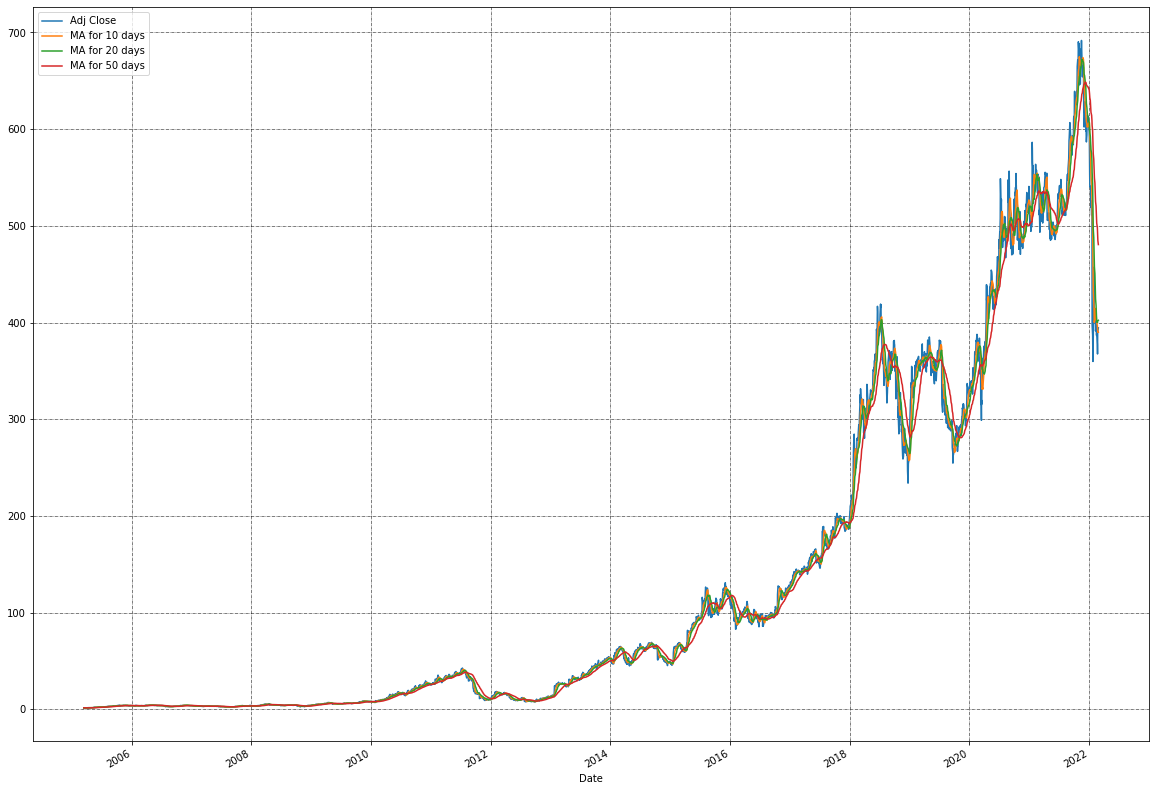

In [92]:
data1[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(20,15))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [93]:
data["Daily Return"] = data["Adj Close"].pct_change()

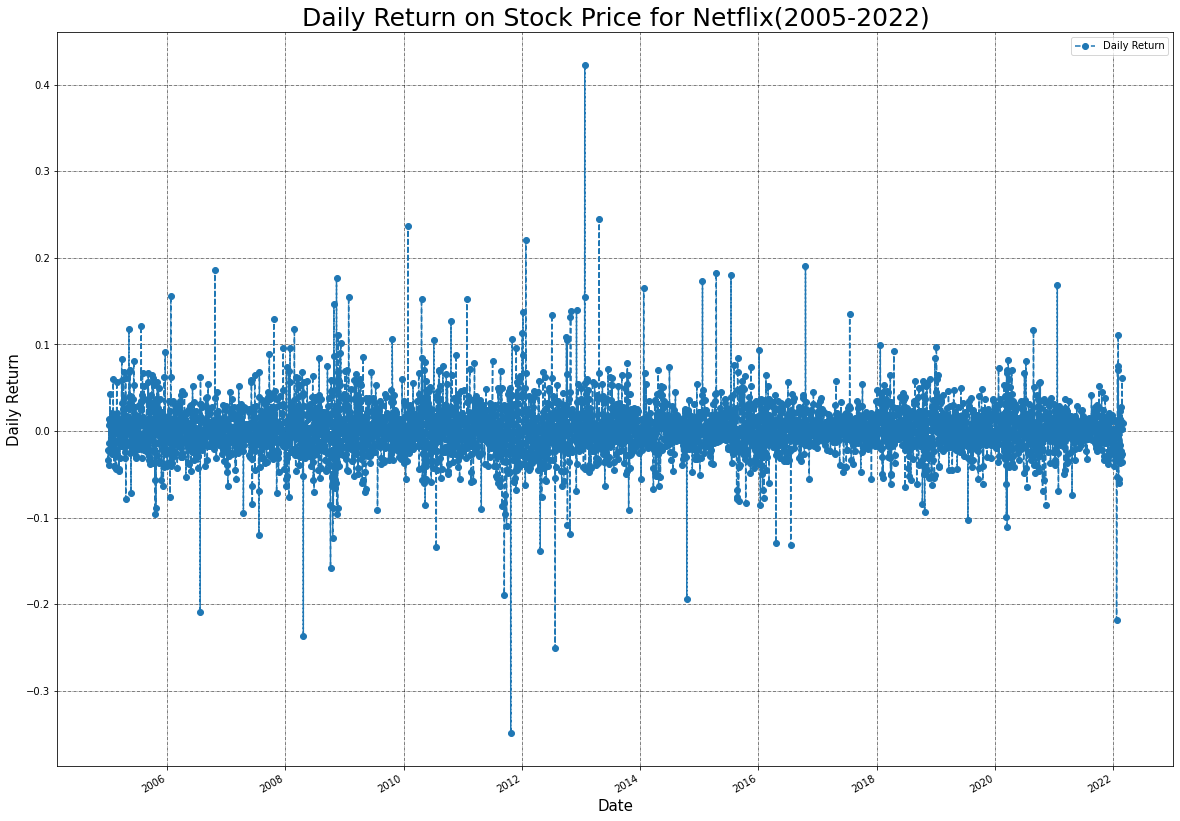

In [94]:
plt.figure(figsize=(20, 15))
plt.ylabel("Daily Return", fontsize = 15)
plt.xlabel(None, fontsize = 15)
plt.title("Daily Return on Stock Price for Netflix(2005-2022)", fontsize = 25)
data["Daily Return"].plot(legend=True, linestyle='--', marker='o')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

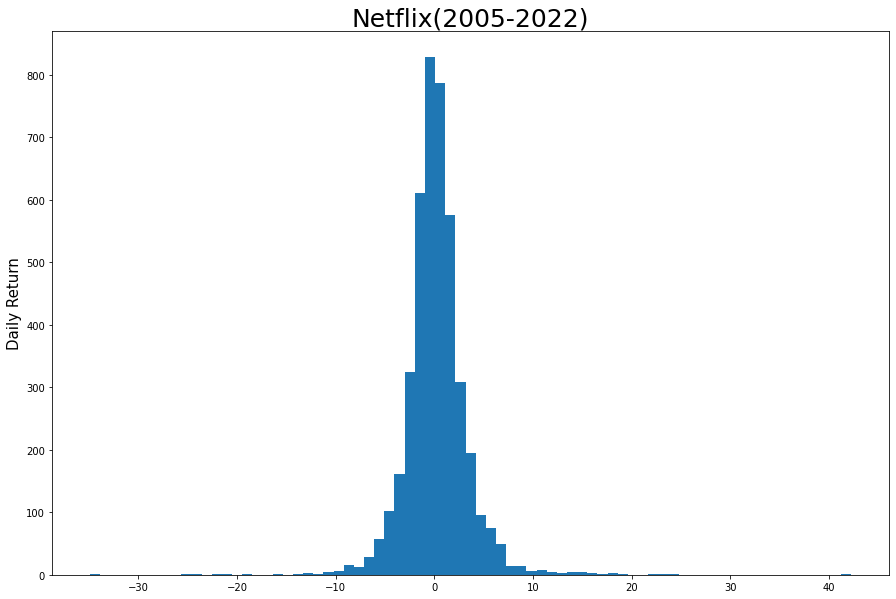

In [95]:
plt.figure(figsize=(15, 10))
plt.ylabel("Daily Return", fontsize = 15)
plt.xlabel(None, fontsize = 15)
plt.title("Netflix(2005-2022)", fontsize = 25)
data['Daily Return PCT'] = data['Daily Return']*100
data['Daily Return PCT'].hist(bins=75)
plt.grid(False)
plt.show()

In [96]:
daily_mean_returns = np.mean(data['Daily Return'])
annual_mean_returns = ((1+ daily_mean_returns)**252)-1
print("Annual Mean Returns: " + str(annual_mean_returns))

Annual Mean Returns: 0.5605843374326998


In [97]:
daily_std = np.std(data['Daily Return'])
annual_std = daily_std*np.sqrt(252)
print("Daily Standard Deviation " + str(daily_std))
print("Annual Standard Deviation " + str(annual_std ))

Daily Standard Deviation 0.03211319354193319
Annual Standard Deviation 0.5097811434962441


In [98]:
daily_std = np.std(data['Daily Return'])
annual_std = daily_std*np.sqrt(252)
daily_var= daily_std**2
annual_var = annual_std**2
print("Daily Variance " + str(daily_var))
print("Annual Variance " + str(annual_var))

Daily Variance 0.0010312571994616597
Annual Variance 0.2598768142643383


In [99]:
returns = data['Daily Return'].dropna()
skewness = skew(returns)
print("Skewness: " + str(skewness))

Skewness: 0.5578386792113471


In [100]:
excess_kurtosis = kurtosis(returns)
print("Excess kurtosis: " + str(excess_kurtosis))

Excess kurtosis: 17.958478584931452


In [101]:
real_kurtosis = excess_kurtosis + 3
print("Real kurtosis: " + str(real_kurtosis))

Real kurtosis: 20.958478584931452
